In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df_train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.drop(['PoolQC','Fence','MiscFeature'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [4]:
df_train.drop(['Alley'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

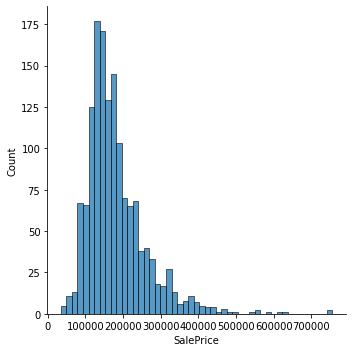

In [6]:
sns.displot(df_train['SalePrice'])

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

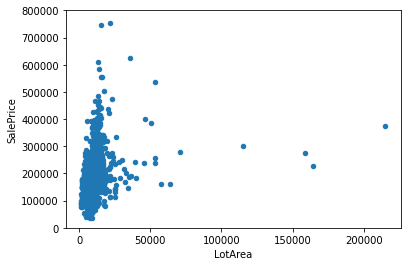

In [7]:
var = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

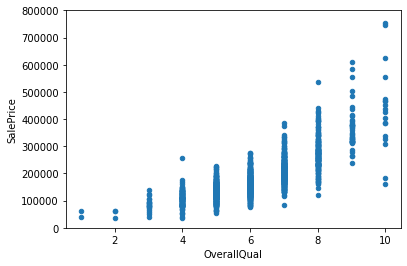

In [8]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

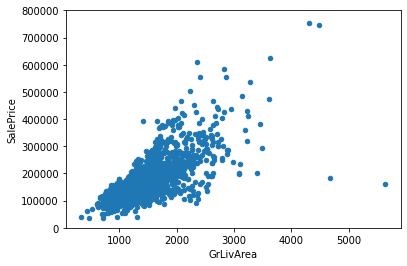

In [9]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='SalePrice', ylabel='MoSold'>

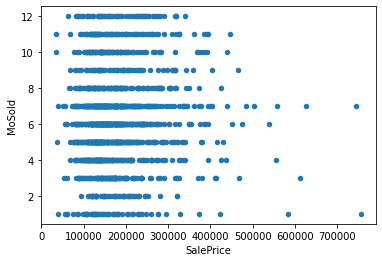

In [10]:
var = 'MoSold'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x='SalePrice', y=var)

<AxesSubplot:xlabel='SalePrice', ylabel='YrSold'>

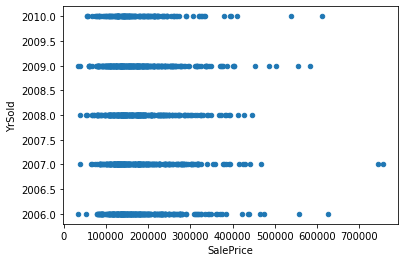

In [11]:
var = 'YrSold'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x='SalePrice', y=var)

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

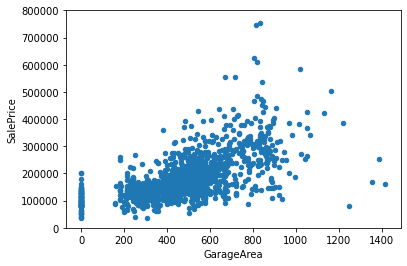

In [12]:
var = 'GarageArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='SalePrice', ylabel='FullBath'>

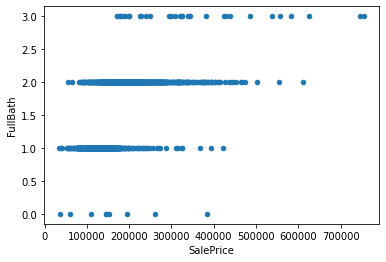

In [13]:
var = 'FullBath'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x='SalePrice', y=var)

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

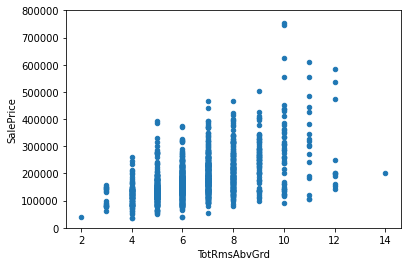

In [14]:
var = 'TotRmsAbvGrd'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

In [15]:
df_train_final = df_train.filter(['Id','LotArea','TotRmsAbvGrd','FullBath','GarageArea','MoSold','YrSold','OverallQual','SalePrice'],axis=1)


In [16]:
df_train_final.head()

,Id,LotArea,TotRmsAbvGrd,FullBath,GarageArea,MoSold,YrSold,OverallQual,SalePrice
0,1,8450,8,2,548,2,2008,7,208500
1,2,9600,6,2,460,5,2007,6,181500
2,3,11250,6,2,608,9,2008,7,223500
3,4,9550,7,1,642,2,2006,7,140000
4,5,14260,9,2,836,12,2008,8,250000


In [17]:
x = df_train_final.filter(['LotArea','TotRmsAbvGrd','FullBath','MoSold','YrSold','OverallQual'], axis=1)
y = df_train_final['SalePrice']



In [18]:
model1 = LinearRegression().fit(x, y)
model2 = RandomForestRegressor().fit(x,y)

In [19]:
rsq1 = model1.score(x,y)
rsq2 = model2.score(x,y)
print(rsq1, rsq2)


0.6984497433204754 0.9622696739456095


In [20]:
df_test = pd.read_csv('house-prices-advanced-regression-techniques/test.csv')
df_test.head()
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [21]:
x_new = df_test.filter(['LotArea','TotRmsAbvGrd','FullBath','MoSold','YrSold','OverallQual'], axis=1)
y_pred = model1.predict(x_new)
print(y_pred)

[120621.28417571 170127.9237315  145009.81907236 ... 147903.78634812
 128354.40958796 239429.51520343]


In [22]:
x_new = df_test.filter(['LotArea','TotRmsAbvGrd','FullBath','MoSold','YrSold','OverallQual'], axis=1)
y_pred1 = model2.predict(x_new)
print(y_pred)

[120621.28417571 170127.9237315  145009.81907236 ... 147903.78634812
 128354.40958796 239429.51520343]


In [23]:
df = pd.DataFrame(y_pred)
df.columns = ['SalePrice']
df = df.set_index(df_test['Id'])
df

,SalePrice
Id,
1461,120621.284176
1462,170127.923731
1463,145009.819072
1464,185730.036206
1465,238910.675899
...,...
2915,72195.302867
2916,81656.212272
2917,147903.786348


In [24]:
df = pd.DataFrame(y_pred1)
df.columns = ['SalePrice']
df = df.set_index(df_test['Id'])
df

,SalePrice
Id,
1461,125422.43
1462,183235.00
1463,169962.00
1464,163088.90
1465,244153.00
...,...
2915,86434.75
2916,82988.75
2917,154199.20
